# ARC Challenge

In [0]:
!pip install --upgrade --force-reinstall keras

     |████████████████████████████████| 378kB 3.5MB/s 
     |████████████████████████████████| 2.9MB 8.1MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 20.2MB 1.7MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 26.1MB 1.7MB/s 
     |████████████████████████████████| 276kB 32.6MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=d3c91af833d4ad3bb535d6af8549d150092edb3f4b5b7b60a0782cd324285254
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built pyyaml
ERROR: google-colab 1.0.0 has requirement six~=1.12.0, but you'll have six 1.15.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is i

In [0]:
!pip install --upgrade --force-reinstall --no-deps kaggle

import os
os.environ['KAGGLE_USERNAME'] = ""
os.environ['KAGGLE_KEY'] = ""

     |████████████████████████████████| 61kB 2.2MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=35344a668c734a4f3d7c0852898b0562b313964bbaac3c614cd443ebc04b1a96
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [0]:
%mkdir "arc-challenge"
%cd arc-challenge

/content/arc-challenge


In [0]:
!kaggle competitions download -c abstraction-and-reasoning-challenge

# -o means force overwrite. The pipe is to silence output, it's noisy.
# Remove .zip when done
!unzip -o abstraction-and-reasoning-challenge &> /dev/null && rm *.zip

  0% 0.00/508k [00:00<?, ?B/s]
100% 508k/508k [00:00<00:00, 91.4MB/s]


In [0]:
print("Directory contents:");
%ls

Directory contents:
evaluation/  sample_submission.csv  test/  training/


In [0]:
training_tasks = sorted(os.listdir("./training"))
print(training_tasks[:3])

['007bbfb7.json', '00d62c1b.json', '017c7c7b.json']


In each task, there are two dictionary keys, train and test. You learn the pattern from the train input-output pairs, and then apply the pattern to the test input, to predict an output.

In [0]:
import json

task_file = "./training/00d62c1b.json"

with open(task_file, 'r') as f:
    task = json.load(f)

print(task.keys())

dict_keys(['train', 'test'])


Tasks have multiple train input-output pairs. Most tasks have a single test input-output pair, although some have more than one.

In [0]:
n_train_pairs = len(task['train'])
n_test_pairs = len(task['test'])

print(f'task contains {n_train_pairs} training pairs')
print(f'task contains {n_test_pairs} test pairs')

task contains 5 training pairs
task contains 1 test pairs


Drilling into the first train input-output pair, we can see the grids are expressed as 2d lists with integers 0-9.

In [0]:
display(task['train'][0]['input'])
display(task['train'][0]['output'])

[[0, 0, 0, 0, 0, 0],
 [0, 0, 3, 0, 0, 0],
 [0, 3, 0, 3, 0, 0],
 [0, 0, 3, 0, 3, 0],
 [0, 0, 0, 3, 0, 0],
 [0, 0, 0, 0, 0, 0]]

[[0, 0, 0, 0, 0, 0],
 [0, 0, 3, 0, 0, 0],
 [0, 3, 4, 3, 0, 0],
 [0, 0, 3, 4, 3, 0],
 [0, 0, 0, 3, 0, 0],
 [0, 0, 0, 0, 0, 0]]

We can see below that no grid is larger than 30x30:

In [0]:
grid_sizes = []

for task_file in training_tasks:
  with open(f"./training/{task_file}", 'r') as f:
    t = json.load(f)
  grid = t["train"][0]["input"]
  grid_sizes.append((len(grid), len(grid[0])))

from collections import Counter
Counter(grid_sizes)


Counter({(1, 5): 1,
         (1, 6): 1,
         (2, 2): 2,
         (2, 4): 1,
         (2, 6): 1,
         (3, 2): 1,
         (3, 3): 49,
         (3, 4): 3,
         (3, 5): 1,
         (3, 6): 3,
         (3, 7): 1,
         (3, 9): 2,
         (3, 10): 3,
         (3, 11): 2,
         (3, 17): 1,
         (3, 30): 1,
         (4, 4): 3,
         (4, 7): 1,
         (4, 8): 1,
         (4, 14): 2,
         (4, 16): 1,
         (5, 5): 14,
         (5, 6): 1,
         (5, 7): 4,
         (5, 9): 1,
         (5, 10): 1,
         (5, 11): 1,
         (5, 15): 1,
         (6, 3): 2,
         (6, 6): 9,
         (6, 9): 1,
         (6, 10): 2,
         (7, 7): 7,
         (7, 9): 1,
         (7, 13): 3,
         (8, 3): 1,
         (8, 4): 1,
         (8, 8): 6,
         (8, 30): 1,
         (9, 3): 2,
         (9, 4): 3,
         (9, 9): 20,
         (9, 11): 2,
         (9, 12): 1,
         (9, 13): 2,
         (10, 2): 2,
         (10, 3): 1,
         (10, 4): 1,
         (10, 7): 1

# Function to plot the first train/test input/output pairs of a task

You can use this function to plot the first train and test grids. The color aligns with what is found on the ARC app. Note though, the ARC app presents the grids to scale, where these display the grids in the same size, regardless of their dimension.

In [0]:
import matplotlib.pyplot as plt
from matplotlib import colors

def plot_task(task):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    fig, axs = plt.subplots(1, 4, figsize=(15,15))
    axs[0].imshow(task['train'][0]['input'], cmap=cmap, norm=norm)
    axs[0].axis('off')
    axs[0].set_title('Train Input')
    axs[1].imshow(task['train'][0]['output'], cmap=cmap, norm=norm)
    axs[1].axis('off')
    axs[1].set_title('Train Output')
    axs[2].imshow(task['test'][0]['input'], cmap=cmap, norm=norm)
    axs[2].axis('off')
    axs[2].set_title('Test Input')
    axs[3].imshow(task['test'][0]['output'], cmap=cmap, norm=norm)
    axs[3].axis('off')
    axs[3].set_title('Test Output')
    plt.tight_layout()
    plt.show()

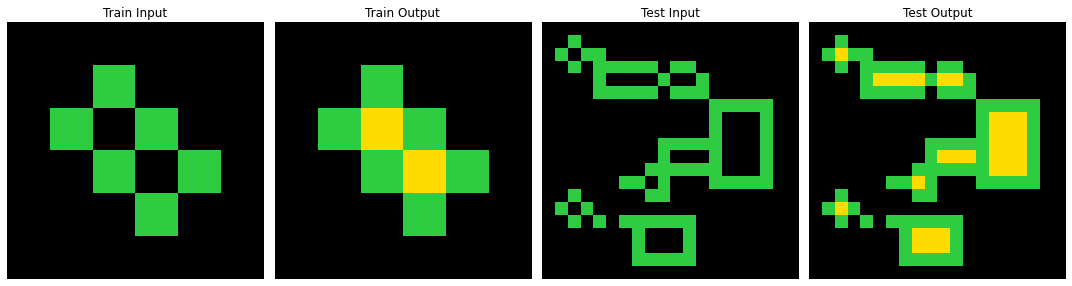

In [0]:
plot_task(task)

# Using the correct prediction format

In [0]:
import pandas

submission = pandas.read_csv("sample_submission.csv", index_col="output_id")
display(submission.head())

,output
output_id,
00576224_0,|32|78| |32|78| |00|00|
009d5c81_0,|00000000000000|00000888888888|00000800080808|...
00dbd492_0,|00000000000222220000|02222222220200020000|020...
03560426_0,|0000000000|0000000000|0000000000|0000000000|0...
05a7bcf2_0,|000000000020000000080000000000|00000000002220...


The output_id is the id of the task, followed by the index of the test input that you should use to make your prediction. The output is the predicted output of the corresponding test input, reformatted into a string representation. (You can make three predictions per output_id, delineated by a space.) Use the following function to convert from a 2d python list to the string representation.

In [0]:
def flattener(pred):
    str_pred = str([row for row in pred])
    str_pred = str_pred.replace(', ', '')
    str_pred = str_pred.replace('[[', '|')
    str_pred = str_pred.replace('][', '|')
    str_pred = str_pred.replace(']]', '|')
    return str_pred

In [0]:
example_grid = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
display(example_grid)
print(flattener(example_grid))

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

|123|456|789|


# Re-creating the sample submission output

This demonstrates how to loop over the sample submission and make predictions.

In [0]:
for output_id in submission.index:
    task_id = output_id.split('_')[0]
    pair_id = int(output_id.split('_')[1])
    f = str(f"test/{task_id}.json")
    with open(f, 'r') as read_file:
        task = json.load(read_file)
    # skipping over the training examples, since this will be naive predictions
    # we will use the test input grid as the base, and make some modifications
    data = task['test'][pair_id]['input'] # test pair input
    # for the first guess, predict that output is unchanged
    pred_1 = flattener(data)
    # for the second guess, change all 0s to 5s
    data = [[5 if i==0 else i for i in j] for j in data]
    pred_2 = flattener(data)
    # for the last guess, change everything to 0
    data = [[0 for i in j] for j in data]
    pred_3 = flattener(data)
    # concatenate and add to the submission output
    pred = pred_1 + ' ' + pred_2 + ' ' + pred_3 + ' ' 
    submission.loc[output_id, 'output'] = pred

submission.to_csv('submission.csv')

samplecsv = pandas.read_csv("sample_submission.csv", index_col="output_id")
display(samplecsv.head())

,output
output_id,
00576224_0,|32|78| |32|78| |00|00|
009d5c81_0,|00000000000000|00000888888888|00000800080808|...
00dbd492_0,|00000000000222220000|02222222220200020000|020...
03560426_0,|0000000000|0000000000|0000000000|0000000000|0...
05a7bcf2_0,|000000000020000000080000000000|00000000002220...


# Vectorizing data

In [0]:
import os
import json
import random
from functools import reduce
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Our vocabulary is:
#   0-9: colors
#   10: new line
#   11: "leads to", or "equals" (marks end of input and signals incoming output)
#   12: end of input/output example (marks end of output)
#   13: padding (& masking for LSTM layers)
# which gives us a total of 14 classes:
num_classes = 14
padding_char = 13

# flattens a grid from 2D to a 1D list, introducing newlines (using word 10)
def grid_to_line(grid):
  return reduce(lambda prev, cur: prev + [*cur] + [10], grid, [])

def load_json_from_file(file):
  with open(file, "r") as f:
    return json.load(f)

# extracts grids from json data, duplicating training grids for each test grid
def extract_grids(files_json):
  test_inputs = []
  test_outputs = []
  train_examples = []
  for obj in files_json:
    for grid in obj["test"]:
      test_inputs.append(grid["input"])
      if "output" in grid: # test grids may not have output
        test_outputs.append(grid["output"])
      # duplicate training grids for each test grid
      train_examples.append([])
      for grid in obj["train"]:
        train_examples[-1].extend([grid["input"], grid["output"]])
  return test_inputs, test_outputs, train_examples

# receives the path to a folder with .json task files
def get_shuffled_files(path_to_folder):
  files = sorted(os.listdir(path_to_folder))
  return random.sample(files, len(files))

# turns a 2D grid into a one hot encoded numpy 2D array
def vectorize_grid(grid, is_input=False, is_output=False, pad=True):
  """
    grid: n by n 2D list with elements going from 0-9, representing colors.
          (original grid format in json files)
    is_input and is_output: used to indicate whether the grid should
                            terminate with an "end of example" character
                            or a "leads to" character.
    pad: specifies whether the grid should be padded to max length
  """
  if is_input == is_output:
    raise Exception("Invalid input/output flag for vectorizing grid")
  
  # grid to line
  if (is_input):
    grid = grid_to_line(grid) + [11]
  else:
    grid = grid_to_line(grid) + [12]
  
  if (pad):
    # pad the grids to max size (30x30 + 30 newlines + termination char = 931)
    grid = grid + [13] * (931 - len(grid))

  # one hot encode grid (num_classes should be defined at start of this cell)
  grid = keras.utils.to_categorical(grid, num_classes=num_classes)

  return np.array(grid)

# Loads tasks from a given folder or a single task from a single file
def load_tasks(path_to_folder=None, path_to_file=None):
  if (
    not path_to_folder and not path_to_file
  ) or (
    path_to_folder and path_to_file
  ):
    raise Exception("Invalid arguments")

  if path_to_folder:
    # get list of files in target folder, shuffling their order
    files = get_shuffled_files(path_to_folder)
    # turn file names into file paths
    file_paths = map(lambda x: os.path.join(path_to_folder, x), files)
  else:
    file_paths = [path_to_file]

  # load file contents into a list
  files_json = []
  for p in file_paths:
    files_json.append(load_json_from_file(p))
  
  # expand json so that every test grid of a task defines one input for the
  # model. train_examples are sequences of input/outputs ([input, output, ...])
  test_inputs, test_outputs, train_examples = extract_grids(files_json)

  # vectorize grids
  for i, grid in enumerate(test_inputs):
    test_inputs[i] = vectorize_grid(grid, is_input=True)
  for i, grid in enumerate(test_outputs):
    test_outputs[i] = vectorize_grid(grid, is_output=True)
  for i, grids in enumerate(train_examples):
    for j, grid in enumerate(grids):
      if j % 2 == 0:
        train_examples[i][j] = vectorize_grid(grid, is_input=True, pad=False)
      else:
        train_examples[i][j] = vectorize_grid(grid, is_output=True, pad=False)

  # We do not pad the train example grids above because we want to flatten them
  # now, so all examples for a given test grid are in one line
  train_examples = list(map(lambda x: reduce(lambda prev, cur: [*prev, *cur], x, []), train_examples))

  # Now pad the training grids manually, taking into account the grids are
  # one hot encoded already
  max_length = max(map(lambda x: len(x), train_examples))
  padding_vector = keras.utils.to_categorical(padding_char, num_classes=num_classes)
  for x in train_examples:
    while len(x) < max_length:
      x.append(padding_vector)

  # convert to numpy arrays
  test_inputs = np.array(test_inputs)
  test_outputs = np.array(test_outputs)
  train_examples = np.array(train_examples)

  return test_inputs, test_outputs, train_examples

test_inputs, test_outputs, train_examples = load_tasks(path_to_folder="./training")

print(f"total training tasks: {len(test_inputs)}")
# print("Final grid format:")
# display(test_inputs[0])
# display(train_examples[0])

total training tasks: 416


In [0]:
import matplotlib.pyplot as plt
from matplotlib import colors

# Helper function that plots an arbitrary number of grids, horizontally
def plot_grids(*args):
    # Add white to end of color map to represent empty space, for padding
    # the model's predictions
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25', '#FFF'])
    norm = colors.Normalize(vmin=0, vmax=9)
    fig, axs = plt.subplots(1, len(args), figsize=(4 * len(args), 4))
    if len(args) == 1:
      axs.imshow(args[0], cmap=cmap, norm=norm)
      axs.axis('off')
    else:
      for i, grid in enumerate(args):
        axs[i].imshow(grid, cmap=cmap, norm=norm)
        axs[i].axis('off')
    plt.show()

# Building a model

In [0]:
# Let's see what our input shapes look like.
# - Each pixel is a 1D array of length 13
# - Each grid is a 2D array of length 931 (padded to max grid size)

print(f"test input shape: {test_inputs.shape}")
print(f"test output shape: {test_outputs.shape}")
print(f"train examples shape: {train_examples.shape}")

test input shape: (416, 931, 14)
test output shape: (416, 931, 14)
train examples shape: (416, 7448, 14)


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

test_grid_input = keras.Input(name="test_grid_input", shape=(931, 14))
examples_input = keras.Input(name="examples_input", shape=(None, 14))

inputs = [test_grid_input, examples_input]

x = layers.Masking(mask_value=13)(examples_input)

x = layers.LSTM(512)(x)

y = layers.Masking(mask_value=13)(test_grid_input)

y = layers.Flatten()(y)

x = layers.Concatenate()([x, y])

x = layers.Dense(13034, activation="relu")(x)

x = layers.Dense(13034, activation="softmax")(x)

x = layers.Reshape((931, 14))(x)

model = keras.Model(inputs=inputs, outputs=x, name="arc_model")

model.summary()

keras.utils.plot_model(model, "model.png", show_shapes=True)

# compile the model
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)

Model: "arc_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
examples_input (InputLayer)     [(None, None, 14)]   0                                            
__________________________________________________________________________________________________
test_grid_input (InputLayer)    [(None, 931, 14)]    0                                            
__________________________________________________________________________________________________
masking_2 (Masking)             (None, None, 14)     0           examples_input[0][0]             
__________________________________________________________________________________________________
masking_3 (Masking)             (None, 931, 14)      0           test_grid_input[0][0]            
__________________________________________________________________________________________

# Training the model

In [0]:
def line_to_grid(l):
  grid = [[]]
  for x in l:
    if (x < 10 and len(grid[-1]) < 30):
      grid[-1].append(x)
    if (x == 10 and len(grid) < 30):
      grid.append([])
  # remove empty rows
  for i, x in enumerate(grid):
    if (len(x) == 0):
      del grid[i]
  # pad grid with black
  num_rows = len(grid)
  max_columns = max(list(map(lambda x: len(x), grid)))
  if num_rows > max_columns:
    # pad each row to num_rows length
    for i, row in enumerate(grid):
      while len(row) < num_rows:
        grid[i].append(0)
  else:
    # pad each row to max_columns
    for i, row in enumerate(grid):
      while len(row) < max_columns:
        grid[i].append(0)
    # pad number of rows to max_columns
    while len(grid) < max_columns:
      grid.append([0] * max_columns)
  return grid

(375, 931, 14)

(375, 7448, 14)

(375, 931, 14)


Epoch 1
47/47 [==============================] - 88s 2s/step - loss: 0.6428 - accuracy: 0.8425 - val_loss: 0.4146 - val_accuracy: 0.8935


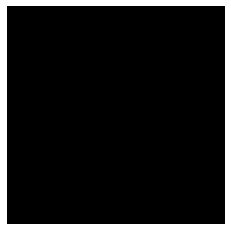


Epoch 2
47/47 [==============================] - 87s 2s/step - loss: 0.4100 - accuracy: 0.8865 - val_loss: 0.4012 - val_accuracy: 0.8957


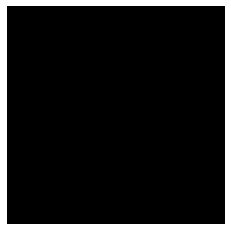


Epoch 3
47/47 [==============================] - 87s 2s/step - loss: 0.3315 - accuracy: 0.9053 - val_loss: 0.4262 - val_accuracy: 0.8877


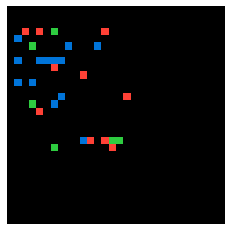


Epoch 4
47/47 [==============================] - 87s 2s/step - loss: 0.2766 - accuracy: 0.9201 - val_loss: 0.4306 - val_accuracy: 0.8900


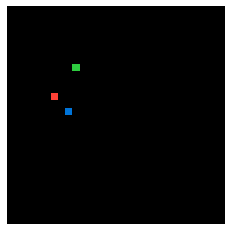


Epoch 5
47/47 [==============================] - 87s 2s/step - loss: 0.2406 - accuracy: 0.9315 - val_loss: 0.4432 - val_accuracy: 0.8852


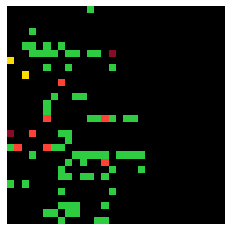


Epoch 6
47/47 [==============================] - 87s 2s/step - loss: 0.2219 - accuracy: 0.9362 - val_loss: 0.4656 - val_accuracy: 0.8850


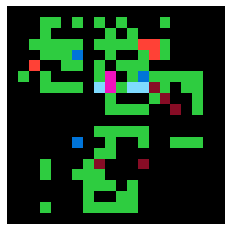


Epoch 7
47/47 [==============================] - 87s 2s/step - loss: 0.1931 - accuracy: 0.9444 - val_loss: 0.5020 - val_accuracy: 0.8911


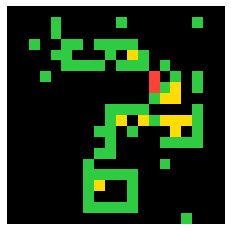


Epoch 8
47/47 [==============================] - 87s 2s/step - loss: 0.1726 - accuracy: 0.9510 - val_loss: 0.5131 - val_accuracy: 0.8789


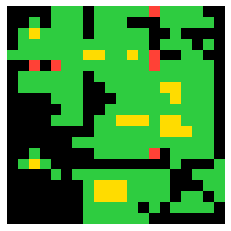


Epoch 9
47/47 [==============================] - 87s 2s/step - loss: 0.1609 - accuracy: 0.9532 - val_loss: 0.5267 - val_accuracy: 0.8935


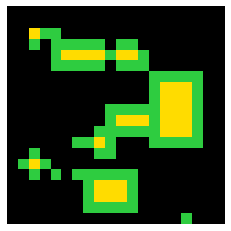


Epoch 10
47/47 [==============================] - 87s 2s/step - loss: 0.1502 - accuracy: 0.9574 - val_loss: 0.5187 - val_accuracy: 0.8934


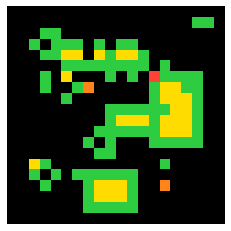


Epoch 11
47/47 [==============================] - 87s 2s/step - loss: 0.1466 - accuracy: 0.9574 - val_loss: 0.5580 - val_accuracy: 0.8893


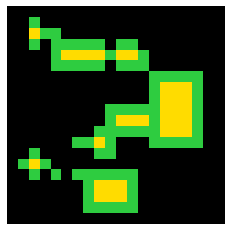


Epoch 12
47/47 [==============================] - 87s 2s/step - loss: 0.1316 - accuracy: 0.9618 - val_loss: 0.5809 - val_accuracy: 0.8929


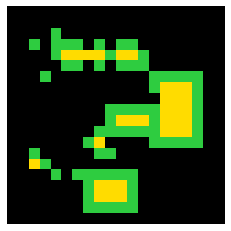


Epoch 13
47/47 [==============================] - 87s 2s/step - loss: 0.1234 - accuracy: 0.9622 - val_loss: 0.5837 - val_accuracy: 0.8908


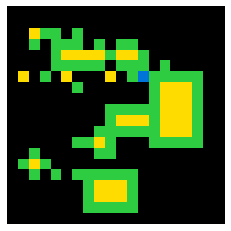


Epoch 14
47/47 [==============================] - 87s 2s/step - loss: 0.1154 - accuracy: 0.9642 - val_loss: 0.5727 - val_accuracy: 0.8911


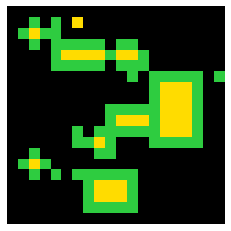


Epoch 15
47/47 [==============================] - 87s 2s/step - loss: 0.1112 - accuracy: 0.9660 - val_loss: 0.5990 - val_accuracy: 0.8828


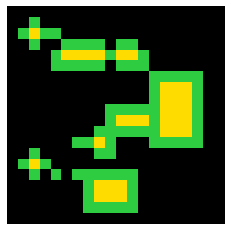


Epoch 16
45/47 [===========================>..] - ETA: 3s - loss: 0.1043 - accuracy: 0.9681

KeyboardInterrupt: ignored

In [0]:
epochs = 20
batch_size = 8

test_inputs, test_outputs, train_examples = load_tasks(path_to_folder="./training")

# Explicitly set apart 10% of the data for validation, which we do not train over
split_at = len(test_inputs) - (len(test_inputs) // 10)
(x1_train, x1_val) = test_inputs[:split_at], test_inputs[split_at:]
(x2_train, x2_val) = train_examples[:split_at], train_examples[split_at:]
(y_train, y_val) = test_outputs[:split_at], test_outputs[split_at:]

# store an input that we'll use to visualize the model's prediction at the end
# of each epoch
test_x1, test_y, test_x2 = load_tasks(path_to_file="./training/00d62c1b.json")

display(x1_train.shape)
display(x2_train.shape)
display(y_train.shape)

for epoch in range(1, epochs):
  print(f"\nEpoch {epoch}")
  model.fit(
    x=[x1_train, x2_train],
    y=y_train,
    batch_size=batch_size,
    validation_data=([x1_val, x2_val], y_val),
    epochs=1,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)]
  )

  pred = model.predict([test_x1, test_x2])
  pred = list(map(lambda x: np.argmax(x, -1), pred[0]))
  pred = line_to_grid(pred)
  # pad grid with 10's, the plotting function will paint those white
  # pred = keras.preprocessing.sequence.pad_sequences(pred, padding='post', value=10)
  plot_grids(pred)


# Creating submission CSV

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def flattener(pred):
    str_pred = str([row for row in pred])
    str_pred = str_pred.replace(', ', '')
    str_pred = str_pred.replace('[[', '|')
    str_pred = str_pred.replace('][', '|')
    str_pred = str_pred.replace(']]', '|')
    return str_pred

In [0]:
import csv

task_ids = []
outputs = []

for filename in sorted(os.listdir("./test"))[:3]: # TODO: remove :3
  task_id = os.path.splitext(filename)[0]
  test_inputs, test_outputs, train_examples = load_tasks(path_to_file=f"./test/{filename}")

  for i, test_input in enumerate(test_inputs):
    x1 = np.array([test_input])
    x2 = np.array([train_examples[i]])
    pred = model.predict([x1, x2])
    pred = list(map(lambda x: np.argmax(x, -1), pred[0]))
    pred = line_to_grid(pred)
    pred = flattener(pred)
    task_ids.append(f"{task_id}_0")
    outputs.append(pred)

with open("/content/drive/My Drive/arc-output.csv", 'w') as myfile:
  wr = csv.writer(myfile)
  wr.writerow(["output_id", "output"])
  for i, task_id in enumerate(task_ids):
      wr.writerow([task_id, outputs[i]])

samplecsv = pandas.read_csv("/content/drive/My Drive/arc-output.csv", index_col="output_id")
display(samplecsv.head())

,output
output_id,
00576224_0,|430000000000000000000000000000|86000000000000...
009d5c81_0,|327600000000000000000000000000|30460980000000...
00dbd492_0,|228723943507884705000000000000|58191897945340...
